## 0. 들어가며 - 공인중개사 철수 #1

철수는 천천마을의 모든 건물을 중개하는 공인중개사입니다.  
철수는 사람들에게 알맞는 건물을 소개해주는 것을 뿌듯해하며 자신의 직업에 만족하고 있습니다.     
하지만 그런 철수에게도 고민이 하나 있었으니... 그건 바로 자신이 관리해야하는 건물의 수가 너무 많다는 것입니다.  
천천마을은 아래처럼 1000 x 1000개, 즉 100만개의 건물로 이루어져 있습니다.  

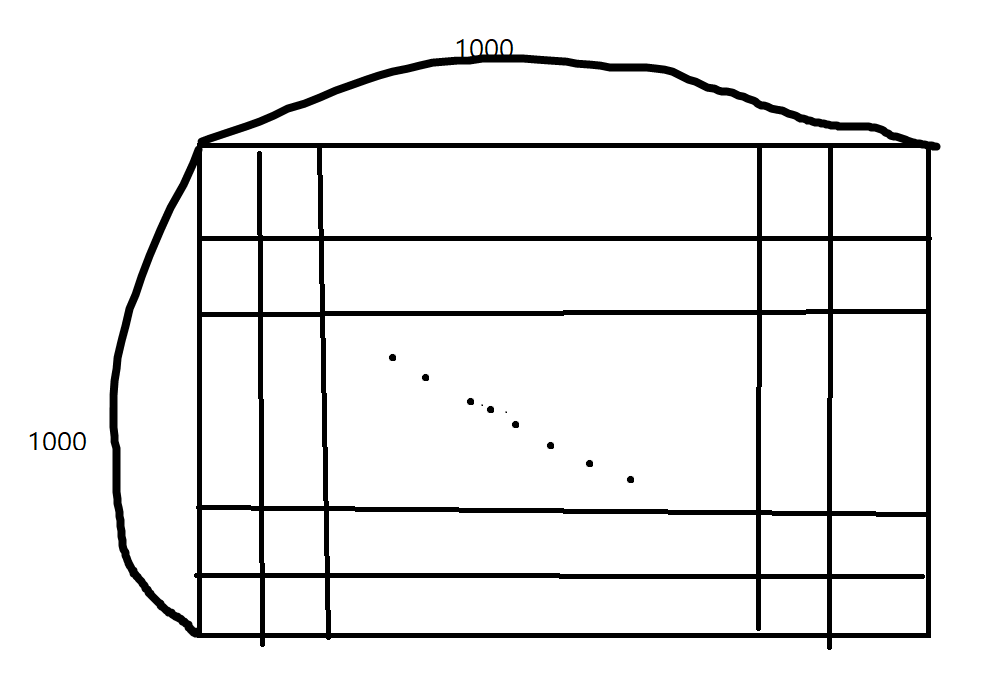

철수는 이 모든 건물을 수기로 기록하고 찾는데, 이 때문에 실수가 잦았습니다.   
철수는 결국 이 건물을 프로그램을 활용해서 관리하려고 합니다.  
철수는 프로그램으로 실수를 줄일 수만 있다면 백만금이라도 낼 의향이 있습니다.  
우리가 철수를 도와 프로그램을 개발해봅시다.   


## 1. 세븐틴을 찾아주세요!

"어떤 집을 찾으세요?"  
철수는 노련한 공인중개사의 면모를 풍기며 손님을 맞았습니다.  
"전등이 17개 있는 집을 찾는데요..."  

철수의 미간이 찌푸려졌습니다. '17개의 전등이 있는 집을 왜 찾는거야'  
"아하하 조금만 기다려주세요^^"  
손님은 이뿐만 아니라 17과 관련된 모든 것을 물어보았습니다.   
철수는 공인중개사 일을 하며 수많은 손님을 만나보았지만, 이토록 특이한 손님은 처음이었습니다.  


"끄응..."
문제는 철수가 17개의 전등을 가진 집을 찾지 못하고 있다는 것입니다.    
손님의 요구가 가능하다면 들어줄 수 있지만, 이번 요구는 너무나도 지엽적이어서 그 가능여부를 확인하는 것조차도 매우 어려웠습니다.   

철수는 17개의 전동이 있는 집을 찾는 프로그램을 간절히 바랐습니다.     
'프로그램만 있었다면...'  

여러분들이 철수를 도와 행운의 세븐틴 집을 찾을 수 있는 프로그램을 작성해주세요.

### 1.1. 집 정보 불러오기

철수가 관리하는 집들의 정보는 **numpy** array 형태로 저장되어 있습니다. 정보들을 불러와 봅시다.
* `np.load(<파일 경로>)`는 경로에 위치한 파일을 읽어 numpy array 형태로 불러옵니다.

In [2]:
import numpy as np

house_arr = np.load('seventeen.npy')
house_arr

array([[ 1,  6, 15, ...,  3,  7,  1],
       [11, 10,  7, ...,  9,  4, 15],
       [ 6, 10,  4, ..., 14,  3, 11],
       ...,
       [10, 13,  2, ...,  1, 11,  2],
       [10, 10, 12, ...,  3,  2,  1],
       [ 1,  6, 14, ...,  5,  8,  3]])

### 1.2. 배열 모양 확인하기
우리는 천천마을에 주택이 1000 x 1000으로 위치하고 있는 것을 알고 있습니다. 불러온 배열의 크기를 확인하여 제대로 불러온 것이 맞는지 확인해봅시다.  
(배열의 크기는 `(행의 개수, 열의 개수)`형식으로 표현됩니다. 따라서 우리 데이터의 크기는 (1000, 1000)이어야 합니다. )
* `arr.shape`은 arr이 numpy array꼴의 변수인 경우에 해당 변수의 크기를 반환합니다. 

In [4]:
house_arr.shape

(1000, 1000)

### 1.3. 배열 타입 확인하기
불러온 1000 x 1000 크기의 배열에는 집별 전등의 개수가 저장되어있습니다.  
전등의 개수는 0 이상의 정수겠죠? (0.5개 짜리 전등은 없기 때문입니다.)  
그렇다면 불러온 배열 또한 실수가 아닌 정수로 이루어져 있어야 합니다. 불러온 배열이 정수로 이루어져 있는지 확인해봅시다.  
* `arr.dtype`은 arr이 numpy array꼴의 변수인 경우에 해당 변수의 자료형을 반환합니다.

In [8]:
house_arr.dtype

dtype('int64')

### 1.4. 17인 인덱스 찾기(1)

이제 본격적으로 17을 찾아보겠습니다. 불러온 배열에서 값이 17인 인덱스를 찾아 봅시다.  
이를 위해서는 먼저 각 배열의 값이 17과 일치하는지 확인해보아야 합니다.     
각 원소가 17과 값이 다르다면 `False`, 17과 값이 같다면 `True`를 출력하도록 해보자.  
* `arr == <값>` - 배열의 모든 원소가 값과 일치한지를 비교한다. 값이 같다면 `True`를, 다르다면 `False`를 출력한다.

In [9]:
house_arr == 17

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

### 1.5. 17인 인덱스 찾기(2)

이제 각 원소가 17과 같은지 아닌지를 찾을 수 있습니다. 해당 배열로부터 17이 존재하는 인덱스를 출력해봅시다.
* `np.argwhere(arr)`은 변수 arr에서 True(1)값이 어느 인덱스에 위치하는지를 출력합니다.

In [10]:
np.argwhere(house_arr == 17)  # 위에서 arr==<값>은 True나 False를 반환했죠? 

array([[17, 17]])

### 1.6. 인덱스 대입하기
철수는 마침내 17이라는 값이 위치한 인덱스를 알아낼 수 있었습니다.  
이제는 알아낸 인덱스를 통해 해당 인덱스의 요소에 실제로 17이 존재하는지를 알아볼 차례입니다.  
해당 인덱스에 존재하는 값을 출력해보세요.

In [11]:
house_arr[17, 17]

17

## 2. 엔딩

"오래 기다리셨습니다! 마침 17개의 전등이 있는 집이 하나밖에 없지 뭐에요."  
손님의 눈이 동그라졌다.  
"한 군데밖에 없어요?"  
"네, 거기다가 17행 17열에 있더라구요"  
손님의 입이 쩌억 벌어졌다.  
"호..혹시 그 집 비었습니까? 바로 사겠습니다."  
"네 여기로 오셔서 도장 찍으시죠"  
철수는 싱글벙글 웃으며 손님에게 계약서를 내밀었다.  
